In [1]:
import ExpControl
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['font.size'] = 22.0
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize'] = 26
plt.style.use('seaborn-white')

In [3]:
meas = ExpControl.Measurements(instr=['vna'])

C:\Users\Public\Anaconda\lib\site-packages\qcodes\instrument\parameter.py:274: UserWarning: Wrapping get method of parameter: trace, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead. Overwriting get will be an error in the future.
  warnings.warn(f'Wrapping get method of parameter: {self.full_name},'


Connected to: Agilent Technologies E5071C (serial:MY46526831, firmware:B.13.20) in 0.63s


In [66]:
meas.setup_vna(power=-30,avgs = 1,measure='S21')

Measure = S21


Trace took 0:00:00.517030


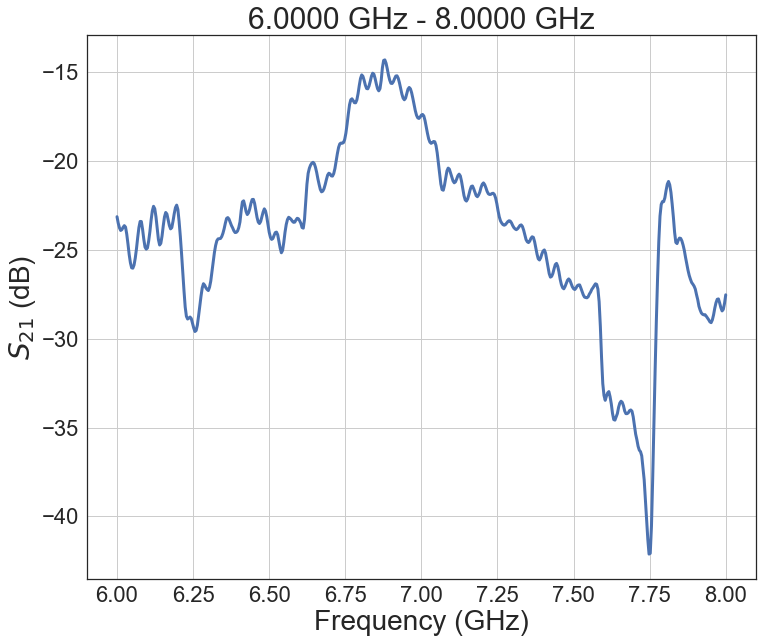

In [67]:
tr = meas.trace(6e09,8e09,npts=501,bandwidth=1000)

In [55]:
filename = 's21_6G_8.0G'

In [56]:
df = pd.DataFrame(data = {'freq':tr[0],'ch1':tr[1][0],'ch2':tr[1][1]})

In [57]:
df.to_pickle('data/GoldBraggs/' + filename + '.pkl')

In [52]:
%%bash 
ls data/GoldBraggs/

s11_0G_20G.pkl
s11_6.8G_7.0G.pkl
s11_6.8G_7.0G_power = 0dBm.pkl
s11_6.8G_7.0G_power = 10dBm.pkl
s11_6.8G_7.0G_power = -10dBm.pkl
s11_6.8G_7.0G_power = -20dBm.pkl
s11_6.8G_7.0G_power = -30dBm.pkl
s11_6.8G_7.0G_power = -40dBm.pkl
s11_6.8G_7.0G_power = -50dBm.pkl
s11_6.8G_7.0G_power = -60dBm.pkl
s11_6.8G_7.0G_power = -70dBm.pkl
s11_6.8G_7.0G_power = -80dBm.pkl
s11_6G_8G.pkl
s21_0G_20.0G.pkl


### Power Sweep

In [61]:
#meas.setup_vna(power=-30,avgs = 1,measure='S11')
powers = [-80,-70,-60,-50,-40,-30,-20,-10,0,10]

Measure = S21
Trace took 0:00:00.537031


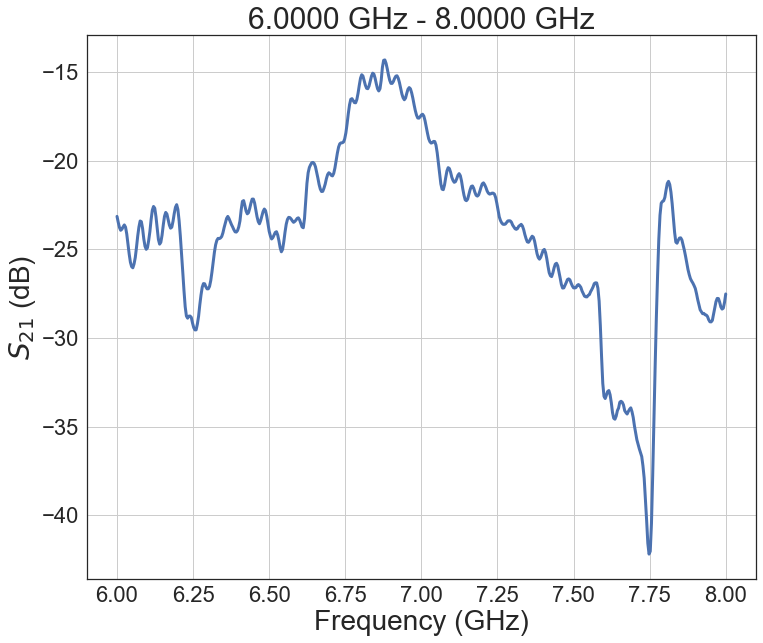

Measure = S21
Trace took 0:00:00.581033


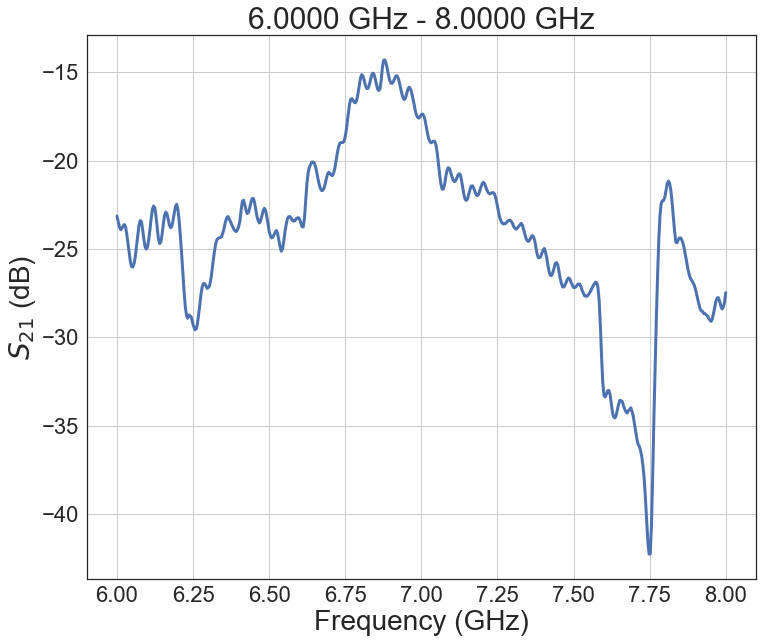

Measure = S21
Trace took 0:00:00.555031


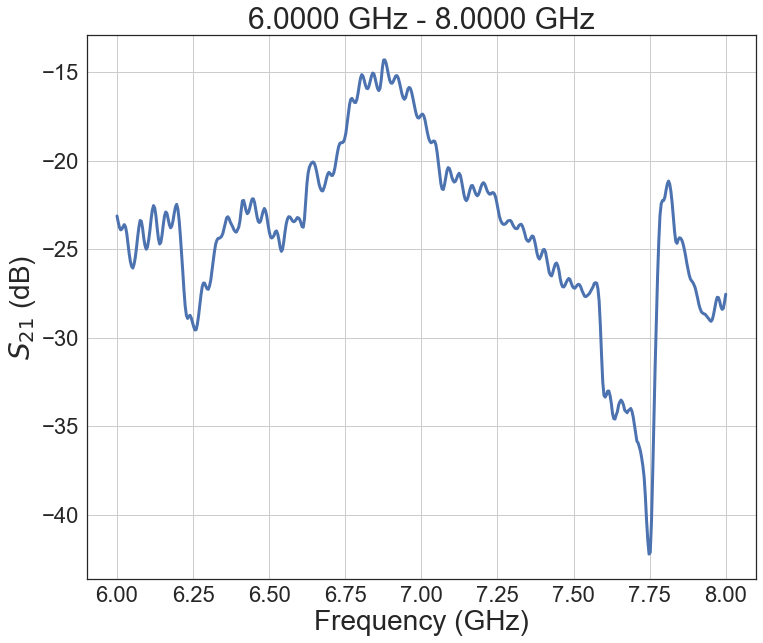

Measure = S21
Trace took 0:00:00.556032


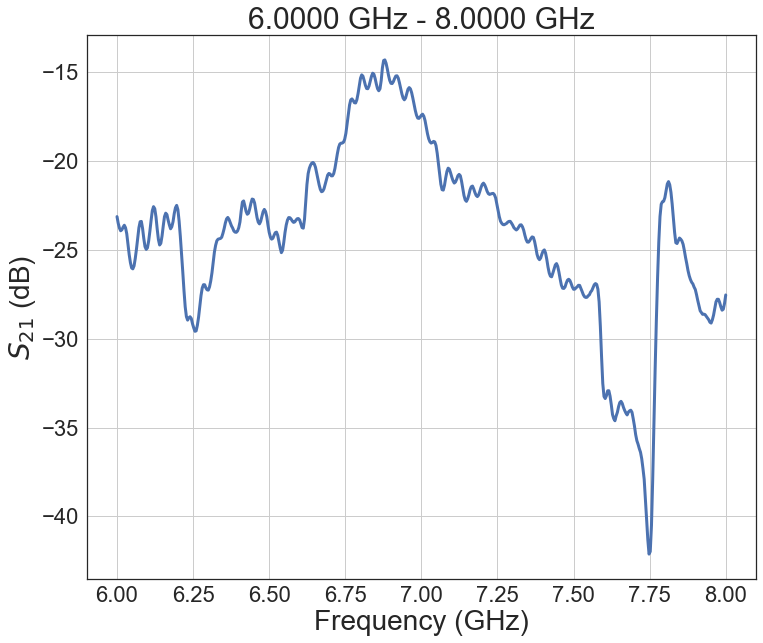

Measure = S21
Trace took 0:00:00.556032


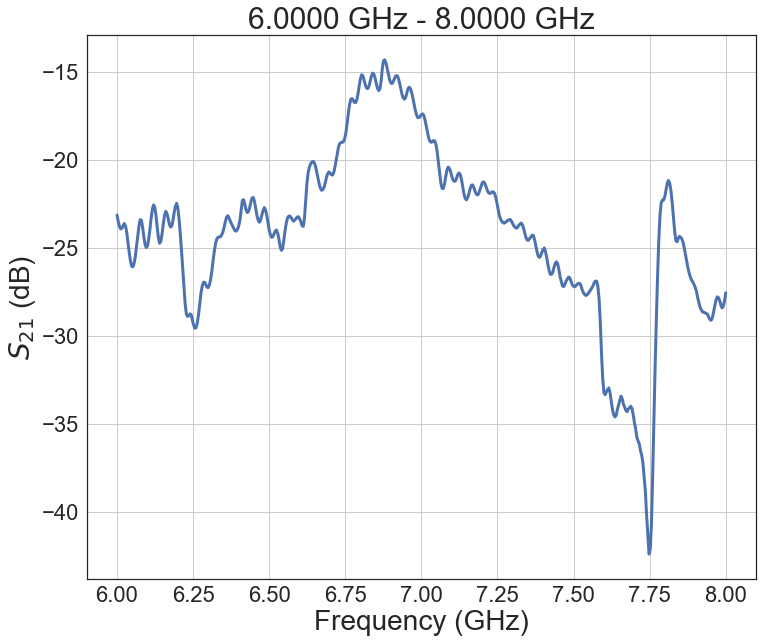

Measure = S21
Trace took 0:00:00.549032


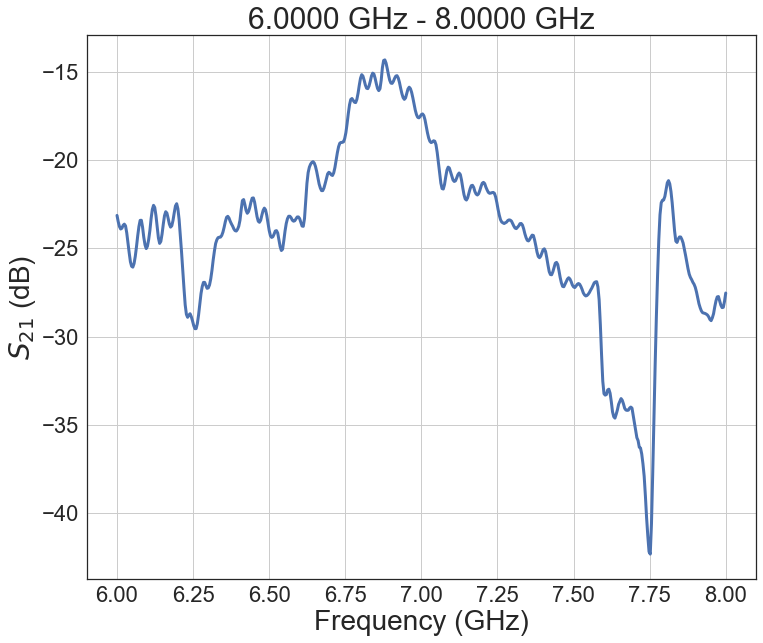

Measure = S21
Trace took 0:00:00.555032


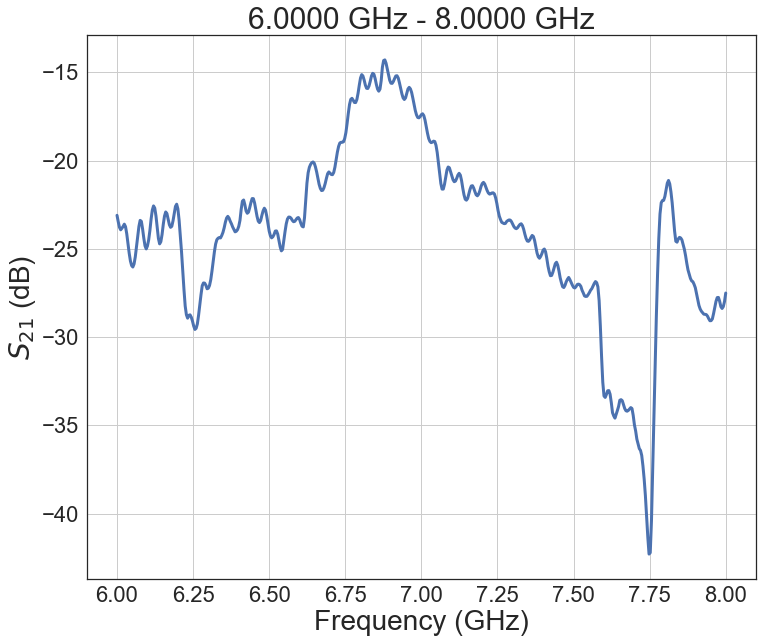

Measure = S21
Trace took 0:00:00.555032


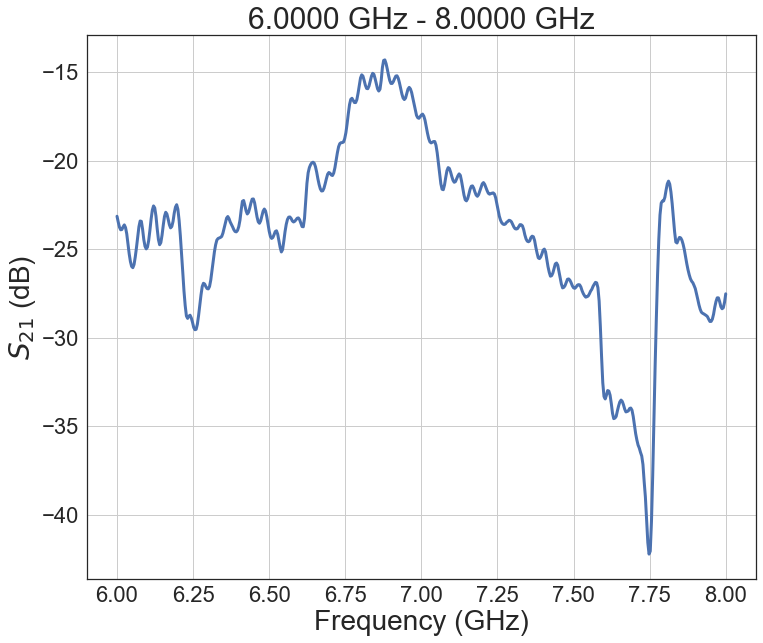

Measure = S21
Trace took 0:00:00.513029


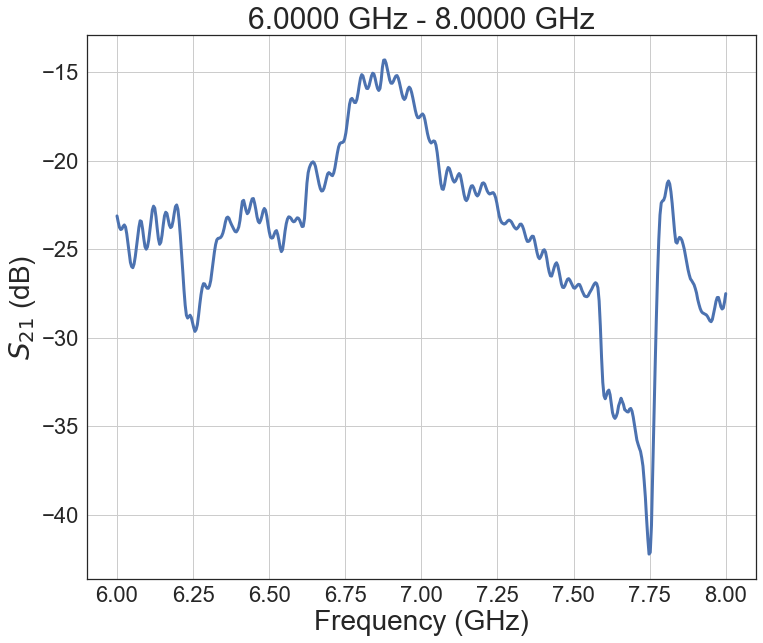

Measure = S21
Trace took 0:00:00.550032


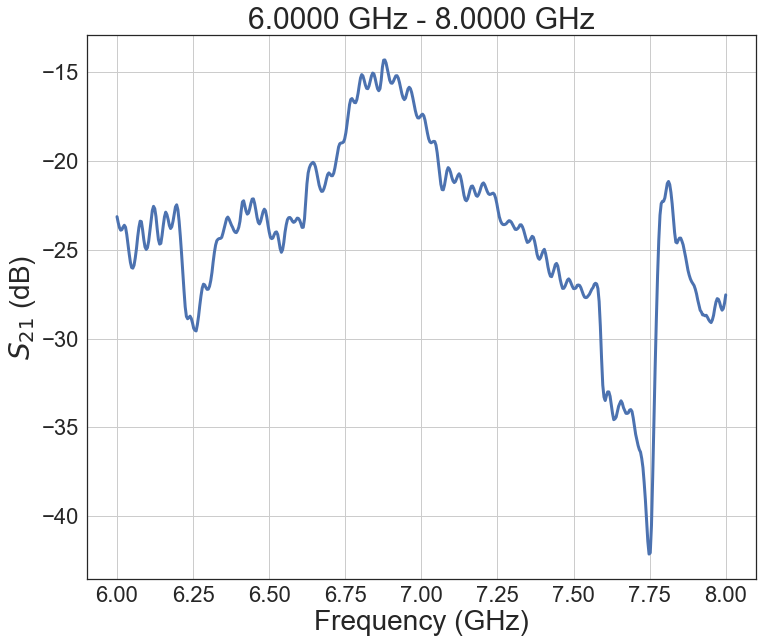

In [63]:
for p in powers:
    meas.setup_vna(power=p,avgs = 1,measure='S21')
    tr = meas.trace(6.0e09,8.0e09,npts=501,bandwidth=1000)
    filename = 's21_6.0G_8.0G_power = ' + str(p) + 'dBm' 
    df = pd.DataFrame(data = {'freq':tr[0],'ch1':tr[1][0],'ch2':tr[1][1]})
    df.to_pickle('data/GoldBraggs/' + filename + '.pkl')